In [29]:
#Zbuduj model używając tylko jednej zmiennej dla pozostałych atrybutów i wybierz ten, który uzyskuje najlepsze wyniki pomiaru jakości regresji. 
#Następnie porównaj najlepiej działający model z regresją wyuczoną na wszystkich zmiennych objaśniających.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets





In [21]:

data = pd.read_csv('/Users/marek.kalbarczyk/Desktop/FC/ML/diabetes.csv',delimiter =',')
data.head(7)


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.0,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.0,3.9512,82,138


In [22]:
data.shape


(442, 11)

In [23]:
data.columns.tolist()

['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

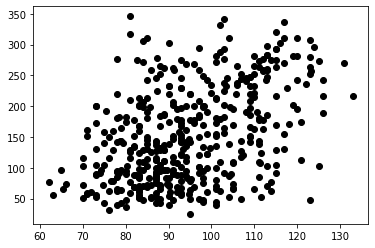

In [25]:
plt.scatter(data.BP, data.Y,  color='black')

In [27]:
data.BP.corr(data.Y)

0.4414817585625712

In [28]:
corr = data.corr() #korelacja
corr

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

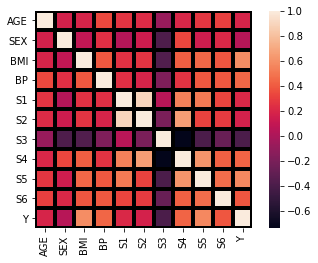

In [32]:
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,linewidths = 3,linecolor='black',cbar= True,square = True)

In [33]:
data.isnull().values.any()

False

In [34]:
dataset = data.iloc[:,:-1] # wyodrebniamy zmienne objaśniające bez targetu

In [35]:
# Wyodrębniamy dane treningowe i testowe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['AGE']], data.Y, test_size=0.3, random_state=0)

In [36]:
data.head(6)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.0,4.1897,68,97


In [37]:
modelAGE = LinearRegression()
# 2. Trenujemy model na danych treningowych
modelAGE.fit(X_train, y_train)
# 3. Sprawdzamy poprawność działania modelu - model dokonuje predykcji na danych testowych i porównuje jej wyniki
# z prawdziwymi etykietami tych danych - zwraca R^2 
modelAGE.score(X_test, y_test)

0.23132831307953794

In [55]:
modelAGE.coef_

array([10.9201072])

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['SEX']], data.Y, test_size=0.3, random_state=0)

In [40]:
modelSEX = LinearRegression()
modelSEX.fit(X_train, y_train)
modelSEX.score(X_test, y_test)

-0.002778268229745029

In [56]:
modelSEX.coef_

array([8.93851771])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['BP']], data.Y, test_size=0.3, random_state=0)

In [42]:
modelBP = LinearRegression()
modelBP.fit(X_train, y_train)
modelBP.score(X_test, y_test)

0.14413128560500243

In [57]:
modelBP.coef_

array([2.63259906])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S1']], data.Y, test_size=0.3, random_state=0)

In [44]:
modelS1 = LinearRegression()
modelS1.fit(X_train, y_train)
modelS1.score(X_test, y_test)

0.002614434176738123

In [58]:
modelS1.coef_

array([0.55416228])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S2']], data.Y, test_size=0.3, random_state=0)

In [46]:
modelS2 = LinearRegression()
modelS2.fit(X_train, y_train)
modelS2.score(X_test, y_test)

0.013407065217925007

In [59]:
modelS2.coef_

array([0.49245324])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S3']], data.Y, test_size=0.3, random_state=0)

In [48]:
modelS3 = LinearRegression()
modelS3.fit(X_train, y_train)
modelS3.score(X_test, y_test)

0.08147667860811292

In [60]:
modelS3.coef_

array([-2.56887625])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S4']], data.Y, test_size=0.3, random_state=0)

In [50]:
modelS4 = LinearRegression()
modelS4.fit(X_train, y_train)
modelS4.score(X_test, y_test)

0.12960624218203198

In [61]:
modelS4.coef_

array([27.02379065])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S5']], data.Y, test_size=0.3, random_state=0)

In [52]:
modelS5 = LinearRegression()
modelS5.fit(X_train, y_train)
modelS5.score(X_test, y_test)

0.19088534917218047

In [62]:
modelS5.coef_

array([88.76468267])

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['S6']], data.Y, test_size=0.3, random_state=0)

In [54]:
modelS6 = LinearRegression()
modelS6.fit(X_train, y_train)
modelS6.score(X_test, y_test)

0.12322482860753792

In [63]:
modelS6.coef_

array([2.52739863])

In [92]:
print('Wyniki Modeli: \n' ,'ModelAGE: \n','SCORE: ',modelAGE.score(X_test, y_test),'COEF: ',modelAGE.coef_,'\n'
      'ModelSEX: \n','SCORE: ',modelSEX.score(X_test, y_test),'COEF: ',modelSEX.coef_,'\n'
     'ModelBP: \n','SCORE: ' ,modelBP.score(X_test, y_test),'COEF: ',modelBP.coef_,'\n',
     'ModelS1: \n','SCORE: ',modelS1.score(X_test, y_test),'COEF: ',modelS1.coef_,'\n',
     'ModelS2: \n','SCORE: ',modelS2.score(X_test, y_test),'COEF: ',modelS2.coef_,'\n',
     'ModelS3: \n','SCORE: ',modelS3.score(X_test, y_test),'COEF: ',modelS3.coef_,'\n',
     'ModelS4: \n','SCORE: ',modelS4.score(X_test, y_test),'COEF: ',modelS4.coef_,'\n',
     'ModelS5: \n','SCORE: ',modelS5.score(X_test, y_test),'COEF: ',modelS5.coef_,'\n',
     'ModelS6: \n','SCORE: ',modelS6.score(X_test, y_test),'COEF: ',modelS6.coef_,'\n')

Wyniki Modeli: 
 ModelAGE: 
 SCORE:  -101.09833497738772 COEF:  [10.9201072] 
ModelSEX: 
 SCORE:  -127.98576406051524 COEF:  [8.93851771] 
ModelBP: 
 SCORE:  0.1125248041100877 COEF:  [2.63259906] 
 ModelS1: 
 SCORE:  -0.5254862919724772 COEF:  [0.55416228] 
 ModelS2: 
 SCORE:  0.014520257594480612 COEF:  [0.49245324] 
 ModelS3: 
 SCORE:  -2.6035631466681957 COEF:  [-2.56887625] 
 ModelS4: 
 SCORE:  -1108.726961733724 COEF:  [27.02379065] 
 ModelS5: 
 SCORE:  -11831.66924034601 COEF:  [88.76468267] 
 ModelS6: 
 SCORE:  0.12322482860753792 COEF:  [2.52739863] 



In [91]:
#ModelS6 najlepszy wynik
print('ModelS6: \n','SCORE: ',modelS6.score(X_test, y_test),'COEF: ',modelS6.coef_,'\n')
predict = modelS6.predict(X_test)

ModelS1: 
 SCORE:  -0.5254862919724772 COEF:  [0.55416228] 



In [85]:
predict

array([103.35346075,  98.92016254,  98.92016254,  92.8243775 ,
        96.70351343, 103.35346075,  92.27021522, 100.58264937,
        90.05356611,  94.48686433,  86.72859245,  98.92016254,
        96.14935116,  91.71605294, 107.78675897,  95.59518888,
       101.13681165,  85.6202679 ,  93.37853977, 113.88254401,
       100.02848709,  97.25767571,  92.8243775 ,  94.48686433,
        93.37853977,  97.81183799, 100.02848709, 103.35346075,
       106.12427214,  98.36600026, 100.58264937,  93.93270205,
        97.81183799,  93.93270205,  97.25767571, 103.35346075,
        96.70351343,  95.0410266 , 102.2451362 , 101.69097392,
        91.16189067, 105.57010986, 100.02848709, 101.13681165,
       100.02848709,  90.05356611,  96.14935116,  98.92016254,
       101.69097392, 106.12427214,  90.60772839,  92.8243775 ,
        98.92016254, 101.69097392,  95.59518888,  92.27021522,
        98.36600026,  93.37853977, 101.69097392,  97.81183799,
        95.59518888,  96.14935116,  97.25767571, 101.13

In [86]:
# Mean squared error
print("Mean squared error: %.2f"
      % np.mean((modelS6.predict(X_test) - y_test) ** 2))

Mean squared error: 7782.26


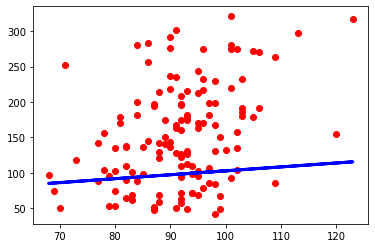

In [88]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, predict, color='blue', linewidth=3)
plt.show()

In [93]:
modelS6.intercept_

-78.05347834929387

In [94]:
#Model na wszystkie zmienne objaśniajace
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['AGE','SEX','BP','S1','S2','S3','S4','S5','S6']], data.Y, test_size=0.3, random_state=0)

In [95]:
modelA = LinearRegression()

modelA.fit(X_train, y_train)

modelA.score(X_test, y_test)

0.3570448549658425

In [96]:
modelA.coef_

array([ -0.28550769, -25.03681245,   1.47148101,  -0.97948331,
         0.8141736 ,  -0.60827407,   0.09048132,  84.67536115,
         0.45179661])

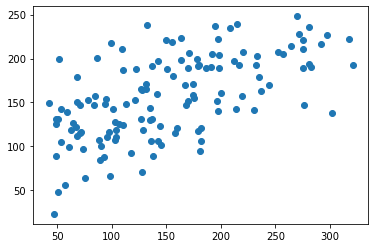

In [98]:
predyktA = modelA.predict(X_test)
plt.scatter(y_test, predyktA)
plt.show()